In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Reading CSVs 

In [2]:
# for i in range(1,13):
#     rough=pd.read_csv(f"result{i}.csv",low_memory=False)
#     rough.drop(['coordinates','media','urls','favorite_count','user_name','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_user_id','place','user_description','possibly_sensitive','quote_id','retweet_id','retweet_screen_name','tweet_url','user_favourites_count','user_followers_count','user_friends_count','user_listed_count','user_screen_name','user_statuses_count','user_time_zone','user_default_profile_image','user_urls'],axis='columns', inplace=True)
#     print(rough.shape)
#     rough.to_csv("update1.csv", mode='a', index=False, header=rough.columns)

In [3]:
# update=pd.read_csv("update1.csv")

In [4]:
# update.sample()

In [5]:
# update.duplicated(keep="first").sum()

In [6]:
# update.drop_duplicates(keep="first",inplace=True)
# update.to_csv("update2.csv", mode='a', index=False, header=update.columns)   

In [7]:
# update.duplicated().sum()

In [8]:
# update.info()

In [9]:
pre=pd.read_csv("update2.csv")

/var/folders/fn/jb3nqp7939dg7f4ckfj5sv2m0000gn/T/ipykernel_1273/1713354869.py:1: DtypeWarning: Columns (2,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  pre=pd.read_csv("update2.csv")


In [10]:
pre.shape

(4599190, 9)

In [11]:
pre["text"].duplicated().sum()

2545935

In [12]:
pre=pre.drop_duplicates(subset='text', keep='first')

In [13]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053255 entries, 0 to 4599181
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   created_at     object
 1   hashtags       object
 2   id             object
 3   lang           object
 4   retweet_count  object
 5   source         object
 6   text           object
 7   user_location  object
 8   user_verified  object
dtypes: object(9)
memory usage: 156.7+ MB


In [14]:
pre.sample()

,created_at,hashtags,id,lang,retweet_count,source,text,user_location,user_verified
918836,Mon Mar 28 06:29:20 +0000 2022,NaN,1508330378557231104.0,en,0.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...","‘The bomb landed there, nobody survived’: Mari...",NaN,False


In [15]:
nulldetail=pre.isnull().sum()
nulldetail

created_at             0
hashtags         1665318
id                     1
lang                   1
retweet_count          1
source                 1
text                   1
user_location     829954
user_verified         28
dtype: int64

In [16]:
pre = pre[pre['lang'].notna()]
pre = pre[pre['retweet_count'].notna()]
pre = pre[pre['source'].notna()]
pre = pre[pre['text'].notna()]
pre = pre[pre['created_at'].notna()]
pre = pre[pre['user_verified'].notna()]
pre = pre[pre['id'].notna()]

In [17]:
pre.shape

(2053227, 9)

In [18]:
pre.isnull().sum()

created_at             0
hashtags         1665302
id                     0
lang                   0
retweet_count          0
source                 0
text                   0
user_location     829926
user_verified          0
dtype: int64

# Remove Decimal To Typecast

In [19]:
def removedecimal(text):
    y=''
    for i in range(0,len(text)):
        if(text[i]=="."):
            break
        else:
            y+=text[i]
    text=y
    return "".join(text.split())        

In [20]:
removedecimal("1234.5")

'1234'

In [21]:
pre=pre[pre["id"]!="id"]

In [22]:
def datatype(pre):
    pre["created_at"]=pre["created_at"].astype("datetime64[ns]")
    pre['id']=pre['id'].astype("int64")
    pre['lang']=pre['lang'].astype("str")
    pre['retweet_count']=pre['retweet_count'].astype("float64")
    pre['source']=pre['source'].astype("str")
    pre['text']=pre['text'].astype("str")
    pre['user_verified']=pre['user_verified'].astype("bool")
    return pre

In [23]:
datatype(pre)
pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053226 entries, 0 to 4599181
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   created_at     datetime64[ns]
 1   hashtags       object        
 2   id             int64         
 3   lang           object        
 4   retweet_count  float64       
 5   source         object        
 6   text           object        
 7   user_location  object        
 8   user_verified  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 142.9+ MB


In [24]:
pre.sample(4)

,created_at,hashtags,id,lang,retweet_count,source,text,user_location,user_verified
2470341,2022-03-20 14:27:11,NaN,1505551532720214016,en,7.0,"<a href=""http://twitter.com/#!/download/ipad"" ...",Democrats link Ukraine’s democracy struggle to...,"Apache Junction, AZ",False
2951832,2022-03-17 00:03:32,NaN,1504247021917638659,en,0.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@JOzereko @CatholicSmark @FrMatthewLC This is ...,"Baton Rouge, LA",False
129656,2022-03-04 10:27:58,NaN,1499693125345890304,en,2.0,"<a href=""http://twitter.com/download/iphone"" r...",@piersmorgan Alexey Navalny is calling people ...,London SW,False
4557026,2022-03-01 03:42:07,NaN,1498503826604757001,en,0.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Two can play that game, Putin... https://t.co/...","Ashland, VA.",False


# NULL Values In Dataset

In [25]:
print(nulldetail)
missing=nulldetail[['hashtags','user_location']]

created_at             0
hashtags         1665318
id                     1
lang                   1
retweet_count          1
source                 1
text                   1
user_location     829954
user_verified         28
dtype: int64


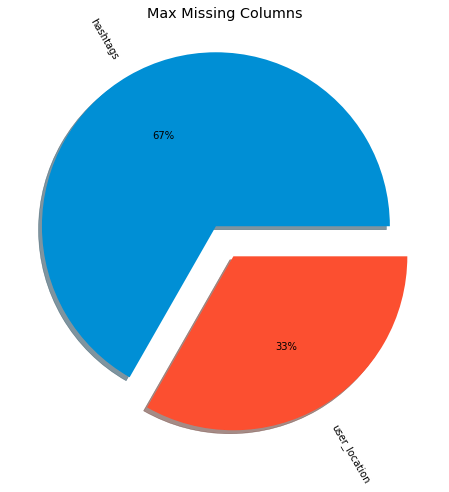

<Figure size 432x288 with 0 Axes>

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
explode = [ 0.1, 0.1]
labels=['hashtags','user_location']
plt.title("Max Missing Columns")
plt.pie(missing,autopct='%.0f%%',labels=labels,explode=explode,shadow=True,rotatelabels='true')
plt.show()
plt.savefig('max_missing_columns.jpg')


# Most Tweets From Which Countries?

In [27]:
def getcountry(text):
    y=''
    for i in text:
        if(i==','or i=='-'):
            y=''
        if(i!=',' and i!='-'):
            y+=i
    text=y
    return "".join(text.split())

In [28]:
getcountry('South Dakota, USA')

'USA'

In [29]:
pre['user_location']=pre['user_location'].astype("str")
pre['user_location']=pre['user_location'].apply(getcountry)

In [30]:
pre.sample(2)

,created_at,hashtags,id,lang,retweet_count,source,text,user_location,user_verified
2042921,2022-03-22 11:42:36,NaN,1506234889045225486,en,0.0,"<a href=""http://twitter.com/download/iphone"" r...",This is awesome https://t.co/PZD1up8RuZ,Downtown,False
2523751,2022-03-20 21:06:42,China oott,1505652074339778560,en,5.0,"<a href=""http://twitter.com/download/android"" ...",Saudi Arabia is #China's top crude supplier ag...,Japan,False


In [31]:
pre['user_location'].replace(to_replace='UnitedStates', value='USA', regex=True,inplace=True)
pre['user_location'].replace(to_replace='NewYork', value='NY', regex=True,inplace=True)
pre['user_location'].replace(to_replace='UnitedKingdom', value='UK', regex=True,inplace=True)
pre['user_location'].replace(to_replace='Canada', value='CA', regex=True,inplace=True)
pre['user_location'].replace(to_replace='FL', value='Florida', regex=True,inplace=True)

In [32]:
c=pre['user_location'].value_counts().loc[lambda x:x>21000]
c=pd.DataFrame(c)
c.rename(columns={'user_location':"Tweet_Counts"},inplace=True)
c[1:]

,Tweet_Counts
USA,101473
CA,35500
England,27144
UK,25776


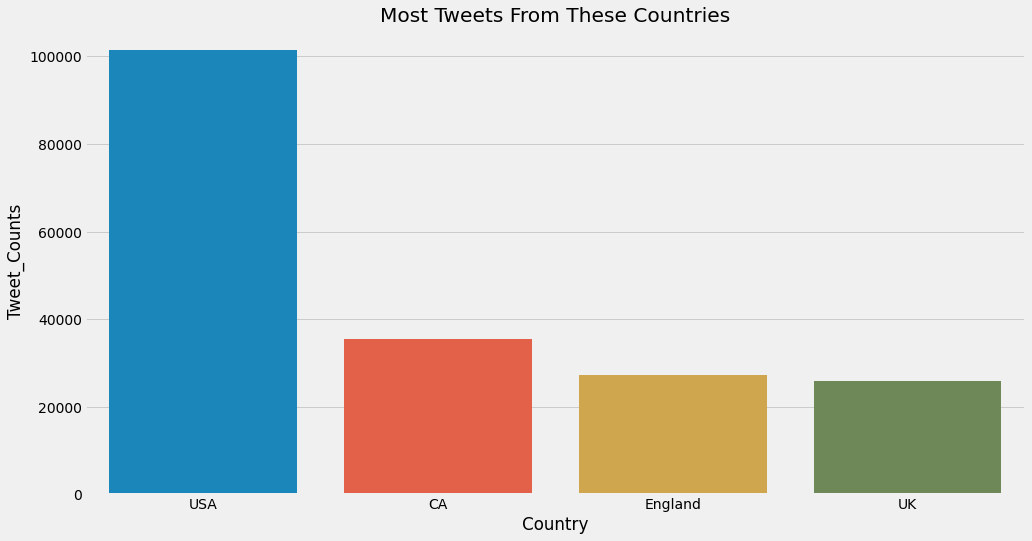

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Most Tweets From These Countries")

plt.xlabel("Country")
plt.ylabel("Tweet Counts")
sns.barplot(y=c['Tweet_Counts'][1:],x=c.index[1:])
plt.show()
plt.savefig('most_tweets_from_countries.png')

# Source Of Tweets

In [34]:
pre['source'][6]

'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>'

In [35]:
def source(text):
    y=''
    for i in text:
        if(i=='r'):
            y=''
        if(i!='r'):
            y+=i
    text=y[:-4]
    return "".join(text.split())

In [36]:
source('<a href="https://mobile.twitter.com" rel="nofollow">Twitter Android</a>')

'oid'

In [37]:
pre['source']=pre['source'].astype("str")
pre['source']=pre['source'].apply(source)

In [38]:
pre['source'].replace(to_replace='oid', value='Android', regex=True,inplace=True)

In [39]:
pre.sample(4)

,created_at,hashtags,id,lang,retweet_count,source,text,user_location,user_verified
184062,2022-03-04 16:55:43,NaN,1499790706445012993,en,0.0,WebApp,Please join me and add your name to this open ...,England,False
2146962,2022-03-21 00:09:03,NaN,1505697961023766528,en,339.0,WebApp,"The decapitation of a Russian tank, as filmed ...",USA,False
2155809,2022-03-21 01:20:24,NaN,1505715919925952512,en,0.0,ess.com,Marine Corps identifies 4 killed in NATO exerc...,USA,False
1078054,2022-03-27 18:54:28,NaN,1508155512432513024,en,33.0,iPhone,however i know for a fact that if one of those...,nan,False


In [40]:
sourceused=pre['source'].value_counts()[0:4]
sourceused=pd.DataFrame(sourceused)
sourceused.rename(columns={'source':"Count"},inplace=True)
sourceused

,Count
Android,690820
WebApp,626385
iPhone,538569
iPad,84815


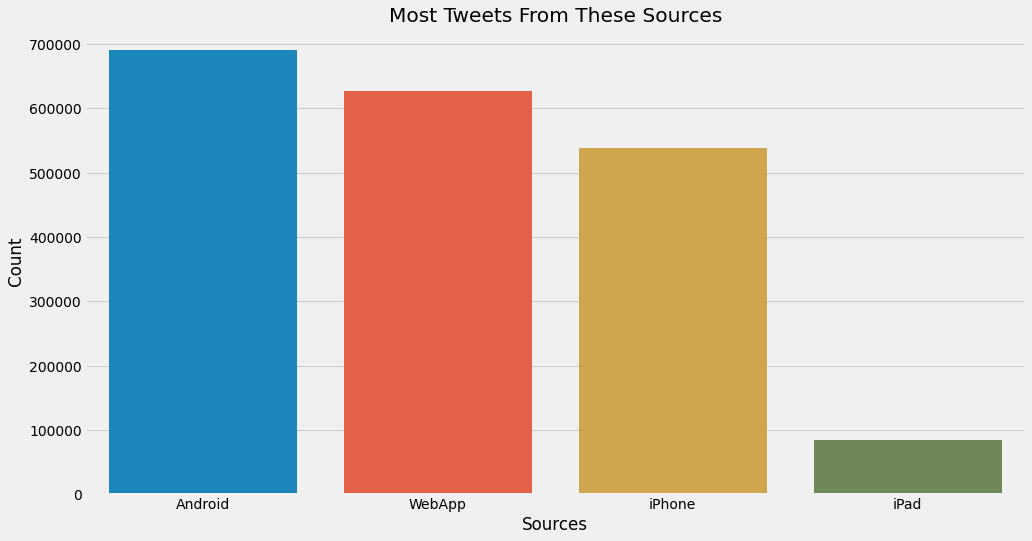

<Figure size 432x288 with 0 Axes>

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Most Tweets From These Sources")

plt.xlabel("Sources")
plt.ylabel("Counts")
sns.barplot(y=sourceused['Count'],x=sourceused.index)
plt.show()

plt.savefig('most_tweet_from_these_sources.png')

# Spread Of Tweets In "March" Month

### Scatter-Plot

In [42]:
pre['created_at'][0]

Timestamp('2022-02-28 07:22:45')

In [43]:
time_series = pd.DataFrame(pre['created_at'].value_counts().reset_index())
time_series.columns = ['date', 'count']

In [44]:
time_series

,date,count
0,2022-03-07 00:00:04,78
1,2022-03-04 00:29:51,77
2,2022-03-01 06:09:10,72
3,2022-03-01 00:05:30,70
4,2022-03-06 00:08:27,70
...,...,...
106246,2022-03-21 21:24:01,1
106247,2022-03-20 05:34:52,1
106248,2022-03-12 14:56:18,1
106249,2022-03-20 15:03:33,1


### Line-Plot

Text(0, 0.5, 'Tweet_Count')

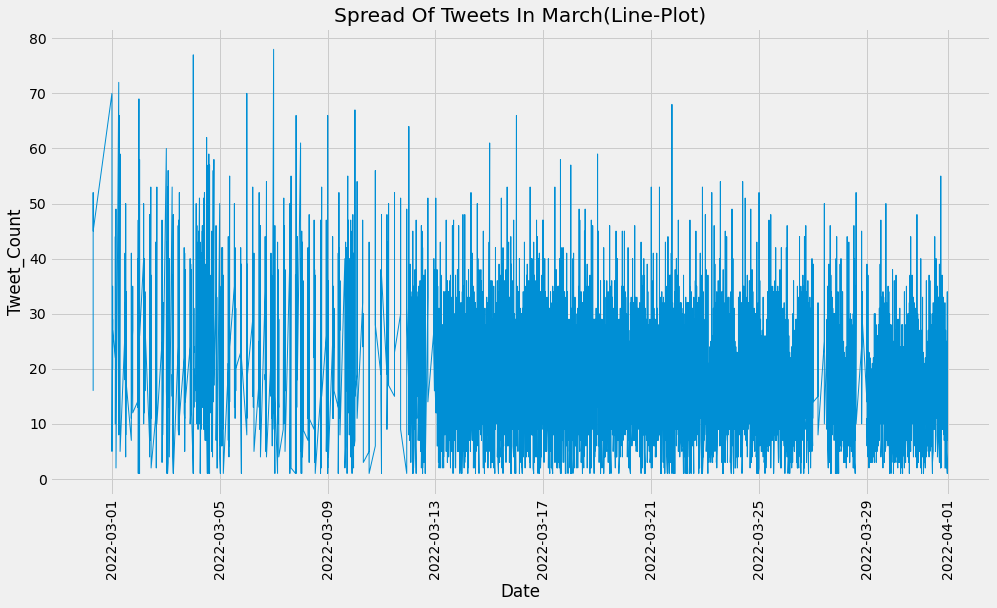

In [45]:
time_series= time_series.sort_values('date', ascending=True)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.plot(time_series['date'], time_series['count'],linewidth=1)
plt.xticks(rotation='vertical')
plt.title("Spread Of Tweets In March(Line-Plot)")
plt.xlabel("Date")
plt.ylabel("Tweet_Count")
 #plt.savefig('spread_of_tweet_lineplot.png')

In [46]:
# pre["text"].value_counts()

# Most Tweets are in which Language?

In [125]:
tweetlang=pre['lang'].value_counts().loc[lambda x:x>17000]
type(tweetlang)

pandas.core.series.Series

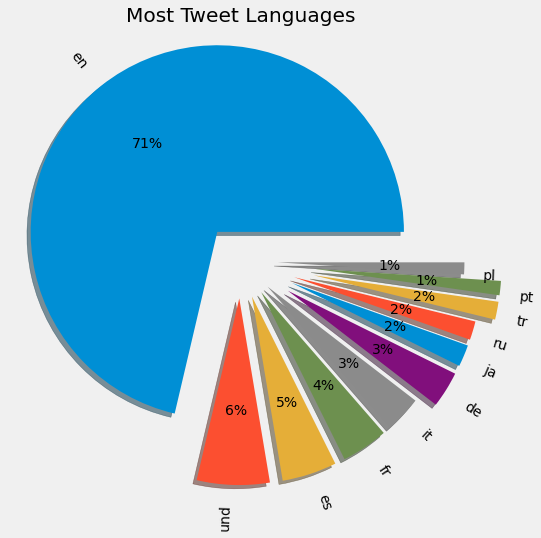

<Figure size 432x288 with 0 Axes>

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
explode = [ 0.2, 0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.4,0.4,0.2]
labels=['hashtags','user_location']
plt.title("Most Tweet Languages")
plt.pie(tweetlang,autopct='%.0f%%',explode=explode,labels=tweetlang.index,shadow=True,rotatelabels='true')
plt.show()

plt.savefig('most_tweet_languages.png')

# Verified Accounts?

In [49]:
verifieduser=pre['user_verified'].value_counts()
verifieduser=pd.DataFrame(verifieduser)
verifieduser.rename(columns={'user_verified':"Count"},inplace=True)
verifieduser

,Count
False,1954352
True,98874


In [50]:
df=pre[pre['user_verified']==True]

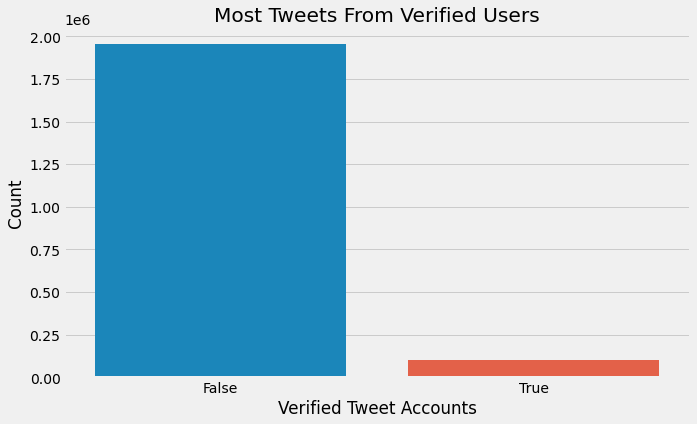

<Figure size 432x288 with 0 Axes>

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,6))
plt.title("Most Tweets From Verified Users")
plt.xlabel("Verified Tweet Accounts")
plt.ylabel("Counts")
sns.barplot(y=verifieduser['Count'],x=verifieduser.index)
plt.show()

plt.savefig('most_tweet_from_verified_users.png')

In [52]:
pre.sample()

,created_at,hashtags,id,lang,retweet_count,source,text,user_location,user_verified
1739932,2022-03-23 00:58:34,NaN,1506435200032645120,en,319.0,WebApp,If you made it this far 1) Thank you! 2) Lemme...,nan,False


In [53]:
# pre.to_csv("preprocessed.csv",index=False)

In [54]:
pre.columns

Index(['created_at', 'hashtags', 'id', 'lang', 'retweet_count', 'source',
       'text', 'user_location', 'user_verified'],
      dtype='object')

In [55]:
pre.shape

(2053226, 9)

# Hashtag

In [56]:
import re
import nltk
text='«\xa0Non à la guerre\xa0» : à Novossibirsk en Sibérie, ces russes sont dans la rue contre «\xa0l’opération militaire\xa0» en #Ukraine. #UkraineRussiaWar https://t.co/tYcWhS6kXO'
ht=re.findall(r"#(\w+)",text)
ht

['Ukraine', 'UkraineRussiaWar']

In [57]:
def ExtractHashtag(tweet):
    hashtag=[]
    for text in tweet:
        ht=re.findall(r"#(\w+)",text)
        hashtag.append(ht)
    return hashtag

In [58]:
def HashtagFrequency(hashtag):
    a=nltk.FreqDist(hashtag)
    df=pd.DataFrame({"Hashtag":list(a.keys()),"Frequency":list(a.values())})
    df=df.nlargest(columns="Frequency",n=100)
    return df

In [59]:
# pre.head()

In [60]:
hashtags=ExtractHashtag(pre["text"])

In [61]:
len(hashtags)

2053226

In [62]:
lst=[[1,3,5],['asd','ad'],["asd"],[1,2,4],[],["we"],[]]
def PassHashtag(hashtags):
    ht=[]
    # cnt=0
    for i in hashtags:
        if(i!=[]):
            for j in i:
                ht.append(j)
    return ht

In [63]:
hashtag=PassHashtag(hashtags)

In [64]:
len(hashtag)

1440040

In [65]:
df=HashtagFrequency(hashtag)

In [66]:
df.to_csv("HashFreq.csv",index=False)

In [67]:
g=df.head(10)
g

,Hashtag,Frequency
0,Ukraine,138210
8,Russia,49816
89,Putin,30281
35,StandWithUkraine,26265
5,UkraineRussiaWar,22263
43,UkraineWar,14855
60,Russian,12756
313,UkraineRussianWar,10897
106,ukraine,10767
430,NATO,10742


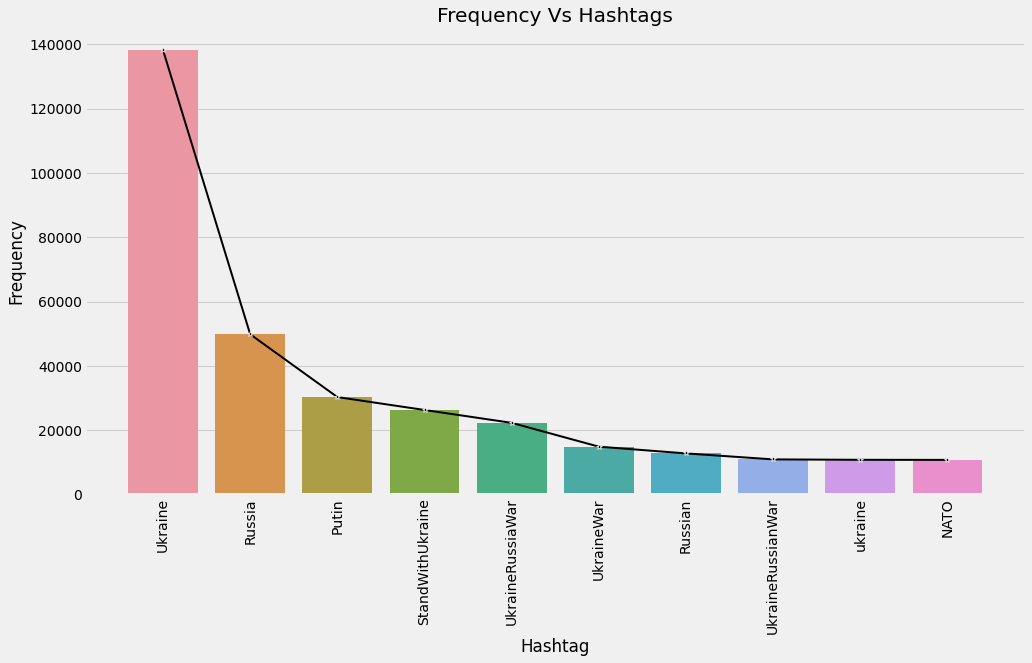

In [68]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=g,x="Hashtag",y="Frequency")
sns.lineplot(y=g['Frequency'],x=g["Hashtag"],color='black',marker='*',linewidth=2)
plt.title("Frequency Vs Hashtags")
plt.xlabel("Hashtag")
plt.ylabel("Frequency")
plt.show()

# Text Preprocessing

In [69]:
import re,string
from nltk.corpus import stopwords
stopword=stopwords.words("english")
def CleanTweet(text): 
    text=str(text).lower()    # lower text
    text=re.sub("https?://\S+|www\.\S+",'',text)   # remove link
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)    #remove punctuation
    text=re.sub('\n|\t','',text)  # remove \n, \t
    text=re.sub('\d','',text)  # remove \t
    text=[word for word in text.split(" ") if word not in stopword]  # remove stopword  (list)
    text=" ".join(text)  # join list elements
    #text=[stemmer.stem(word) for word in text.split(" ")]  # stemming
    #text=" ".join(text)  # join list elements
    return text

In [70]:
pre["text"][0]

"@newsbusters It's because Trump is the head of the Republican party and an idiot who praises Putin who just invaded a sovereign nation."

In [71]:
pre["cleaned_tweet"]=pre["text"].apply(CleanTweet)

## Lemmatization

In [73]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

print("\n\nLemmatizing....!!")
pre['cleaned_tweet'] = pre["cleaned_tweet"].apply(lemmatize_text)



def joinText(text):
    text=" ".join(text)
    return text


print("\n\nJoining text....")
pre['cleaned_tweet'] = pre['cleaned_tweet'].apply(joinText)

print("\n\nLemmatized_SuccessFully!!")

[nltk_data] Downloading package wordnet to /Users/prkskrs/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/prkskrs/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!




Lemmatizing....!!


Joining text....


Lemmatized_SuccessFully!!


In [74]:
pre["cleaned_tweet"][0]

'newsbusters trump head republican party idiot praise putin invaded sovereign nation'

In [75]:
# pre.to_csv("preprocessed.csv",index=False)

# Subjectivity And Polarity

In [76]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

In [77]:
pre["Subjectivity"]=pre["cleaned_tweet"].apply(getSubjectivity)
print("Subjectivity Column Created!!")
pre["Polarity"]=pre["cleaned_tweet"].apply(getPolarity)
print("Polarity Column Created!!")

In [78]:
def catchsentiment(polarity):
    if polarity<0:
        return 'Negative'
    elif polarity==0:
        return 'Neutral'
    else:
        return 'Positive'
pre['Sentiment']=pre["Polarity"].apply(catchsentiment)

In [80]:
# pre.to_csv("preprocessed.csv",index=False)

# Wordcloud

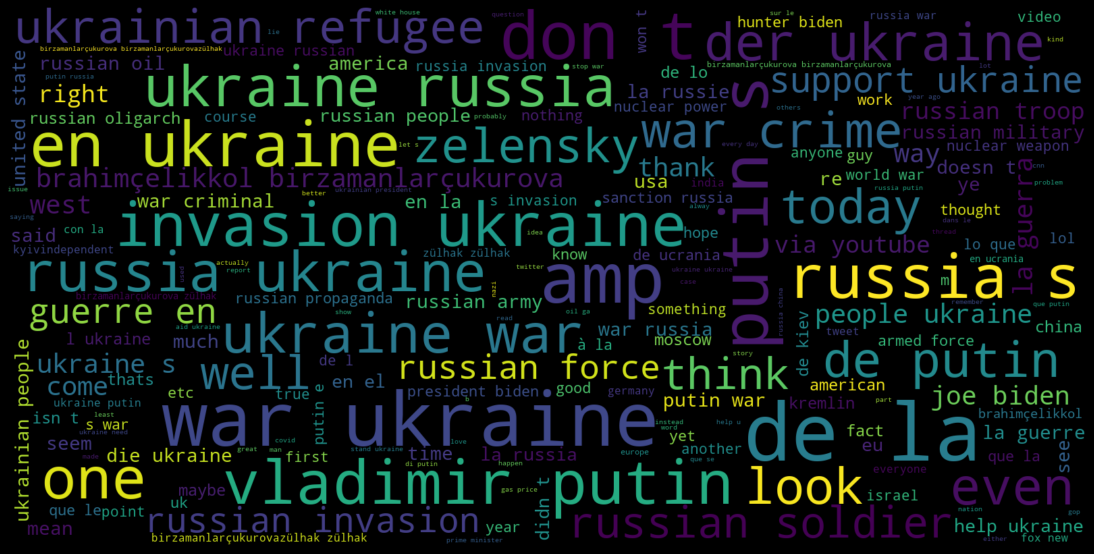

<Figure size 432x288 with 0 Axes>

In [82]:
joinword=" ".join(tweet for tweet in pre["cleaned_tweet"])
plt.figure( figsize=(15,8), facecolor='k')
wordcloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=119).generate(joinword)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig('wordcloud.png')

# Plot Polarity and Subjectivity

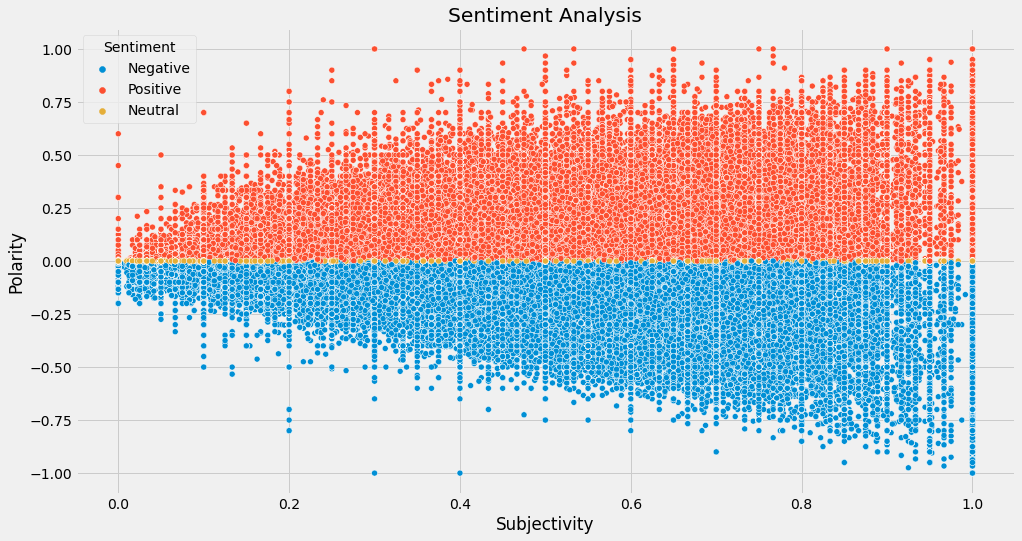

In [83]:
plt.style.use("fivethirtyeight")
plt.figure( figsize=(15,8))
sns.scatterplot(x='Subjectivity', y="Polarity", data=pre, hue='Sentiment',color=['red'])
plt.title("Sentiment Analysis")
plt.xlabel("Subjectivity")
plt.ylabel("Polarity")
plt.savefig('sentiment_analysis.png')

### Percentage of Positive tweets

In [103]:
postweets=pre[pre.Sentiment=="Positive"]
postweets=postweets["cleaned_tweet"]
pos=float(round((postweets.shape[0]/pre.shape[0])*100,1))
print(f"{round((postweets.shape[0]/pre.shape[0])*100,1)}% \n")
print(postweets.iloc[12])

25.9% 

ukraine still winning hour later good morning world


### Percentage of Neutral tweets

In [104]:
neutraltweets=pre[pre.Sentiment=="Neutral"]
neutralweets=neutraltweets["cleaned_tweet"]
neu=float(round((neutralweets.shape[0]/pre.shape[0])*100,1))
print(f"{round((neutralweets.shape[0]/pre.shape[0])*100,1)}% \n")
print(neutralweets.iloc[12])

55.8% 

kyiv got carpetbombed night sleep regain strength heard periodic row explosion throughout night


### Percentage of Negative tweets

In [105]:
negtweets=pre[pre.Sentiment=="Negative"]
negtweets=negtweets["cleaned_tweet"]
neg=float(round((negtweets.shape[0]/pre.shape[0])*100,1))
print(f"{round((negtweets.shape[0]/pre.shape[0])*100,1)}% \n")
print(negtweets.iloc[12])

18.2% 

⚡️belarus renounce nonnuclear neutral status allowing russia place nuclear weapon territory result referendum held today citizen allegedly supported constitutional amendment


In [133]:
data = {'Positive' : pos,
        'Negative' : neg,
        'Neutral' : neu}
tf = pd.Series(data) 
tf

Positive    25.9
Negative    18.2
Neutral     55.8
dtype: float64

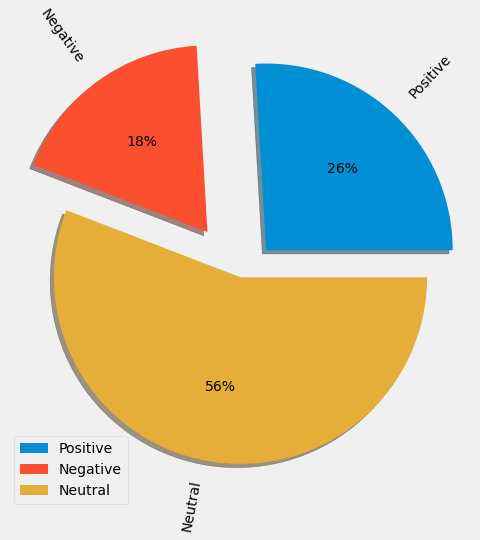

In [139]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
explode=[0.2,0.3,0]
plt.pie(tf,autopct='%.0f%%',explode=explode,labels=tf.index,shadow=True,rotatelabels='true')
plt.legend(loc='lower left')
plt.show()

# Which Countries Are Supporting Ukraine In This Crisis ?

In [239]:
def getList(text):
    lst=[]
    for i in text:
        lst=text.split(" ")
    return lst

support="support ukraine"
suppUk=getList(support)
suppUk
j=0
def freqCalc(text):
    global suppUk,j
    count=""
    t=0
    s=0
    u=0
    lst=getList(text)
    for i in lst:
        if (i in suppUk):
            if(i=="support"):
                s+=1
            elif(i=="ukraine"):
                u+=1
        if(s>=1 and u>=1):
                count="yes"
        else:
            count="no"
    j+=1   
    #print(j)
    return count

In [240]:
freqCalc("ukraine ukr asdasd support ukraine asd sadad")

'yes'

In [241]:
pre["SuppUkraine"]=pre["cleaned_tweet"].apply(freqCalc)

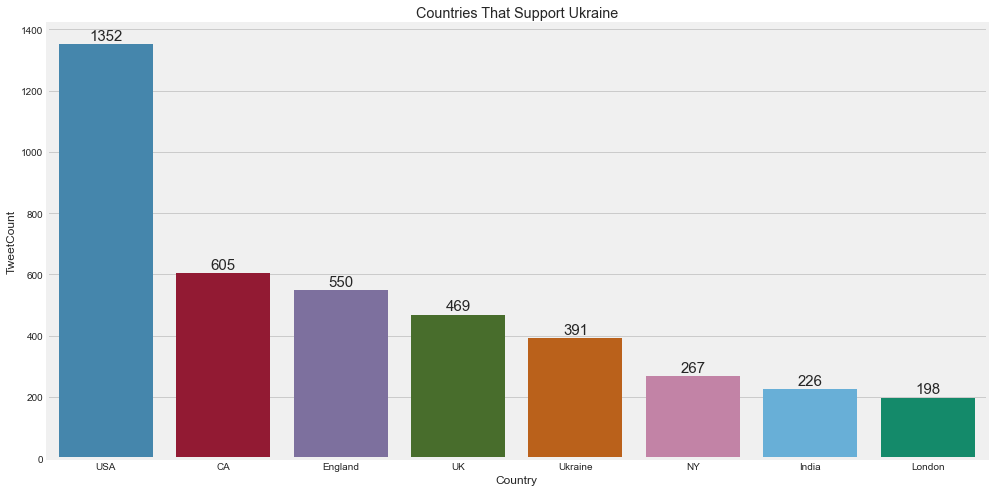

In [267]:
supp=pre[(pre["SuppUkraine"]=="yes")]

%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 8))
plt.style.use("bmh")

suppDf=supp["user_location"].value_counts()
suppDf=suppDf.reset_index()
suppDf.columns = ['Country','TweetCount']
suppDf=suppDf[1:9]

plt.title("Countries That Support Ukraine")
plots=sns.barplot(data=suppDf,x="Country",y="TweetCount")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

In [268]:
supp["cleaned_tweet"].iloc[90]

'czech citizen tonight rallying support ukraine'

# Company's That Made More Impact on Russia's Economy

In [270]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

support="goldman oracle shell bp equinor microsoft mcdonalds netflix heineken puma sephora zara hm pepsi coca morris starbucks accenture airbnb aldi bbdo blackrock carlsberg leroy jti renault auchan samsung ikea deloitte volkswagen toyota acer adidas adobe airbus alphabet amazon apple burberry citi mcdonald harley"
suppUk=getList(support)
suppUk
# print(suppUk)

def companyLeft(text):
    global suppUk,j
    count=""
    pol=getPolarity(text)
    t=0
    lst=getList(text)
    for i in lst:
        if (i in suppUk):
            count=i
            break
        else:
            count="Not Given"
    return count

pre["CompanyLeft"]=pre["cleaned_tweet"].apply(companyLeft)

In [271]:
# pre.head()

In [272]:
comp=pre[(pre["CompanyLeft"]!="Not Given") & (pre["CompanyLeft"]!="")]

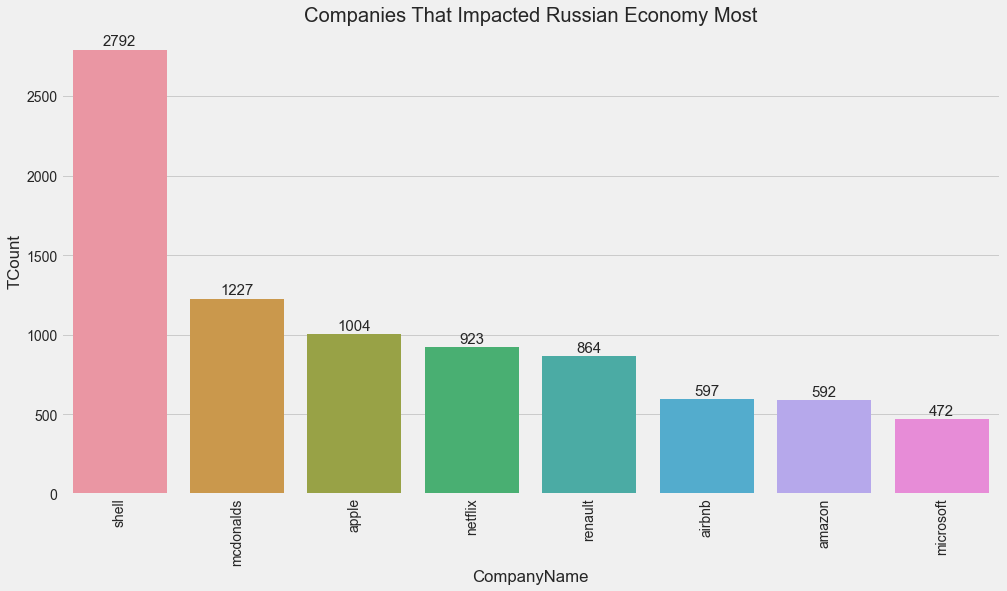

In [273]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
suppDf=comp["CompanyLeft"].value_counts()
suppDf=suppDf.reset_index()
suppDf.columns = ['CompanyName','TCount']
suppDf=suppDf.head(8)
plt.title("Companies That Impacted Russian Economy Most")
plt.xticks(rotation=90)
plots=sns.barplot(data=suppDf,x="CompanyName",y="TCount")
#sns.lineplot(y=suppDf['TweetCount'],x=suppDf["Country"],color='black',marker='*',linewidth=2)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

# Percentage Of Verified Account Showing Support For Russia, Ukraine Seperately 

In [265]:
p=pre[(pre["SuppUkraine"]=="yes")&(pre["user_verified"]==True)]

In [275]:
support="support russia"
suppUk=getList(support)
suppUk
j=0
def suppRuso(text):
    global suppUk,j
    count=""
    t=0
    s=0
    u=0
    lst=getList(text)
    for i in lst:
        if (i in suppUk):
            if(i=="support"):
                s+=1
            elif(i=="russia"):
                u+=1
        if(s>=1 and u>=1):
                count="yes"
        else:
            count="no"
    j+=1   
    #print(j)
    return count

In [276]:
pre["SuppRussia"]=pre["cleaned_tweet"].apply(suppRuso)

In [284]:
russ=pre[(pre["SuppRussia"]=="yes")&(pre["user_verified"]==True)]
print(russ.shape)
ukr=pre[(pre["SuppUkraine"]=="yes")&(pre["user_verified"]==True)]
print(ukr.shape)

(575, 16)
(1701, 16)


In [285]:
russ_support_perc=(russ.shape[0]/(russ.shape[0]+ukr.shape[0]))*100
russ_support_perc
ukr_support_perc=(ukr.shape[0]/(russ.shape[0]+ukr.shape[0]))*100
ukr_support_perc

25.263620386643233

In [287]:
data = {'Russia' : russ_support_perc,
        'Ukraine' : ukr_support_perc
       }
f = pd.Series(data) 
f

Russia     25.26362
Ukraine    74.73638
dtype: float64

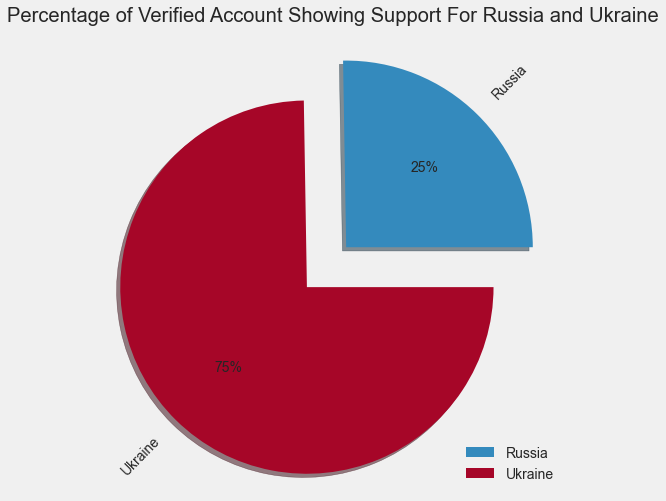

In [293]:
plt.style.use("bmh")
plt.figure(figsize=(15,8))
explode=[0.1,0.2]
plt.title("Percentage of Verified Account Showing Support For Russia and Ukraine")
plt.pie(f,autopct='%.0f%%',explode=explode,labels=f.index,shadow=True,rotatelabels='true')
plt.legend(loc='lower right')
plt.show()

In [295]:
# pre.to_csv("preprocessed.csv",index=False)